In [2]:
import numpy as np
import pandas as pd

import scipy.stats as stats
import matplotlib.pyplot as plt  #Пакет для построяния графиков и прочего

<p style="align: center;"><img align=center src="https://netology.ru/blog/wp-content/uploads/2020/03/logo-full-color-black-1.png"  width=400></p>
<h3 style="text-align: center;"><b>«Статистическая проверка гипотез для связанных выборок. A/B тесты и как их проводить»</b></h3>


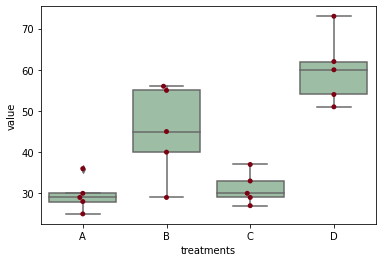

In [2]:
import pandas as pd  # Подгрузим пакет 

df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t") # Подгрузим данные

# изменить форму кадра данных d, подходящего для пакета statsmodels
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])


# заменить имена столбцов
df_melt.columns = ['index', 'treatments', 'value']

# создать коробчатую диаграмму, чтобы увидеть распределение данных по обработкам. Используя коробчатую диаграмму, мы можем
# легко обнаружить различия между разными методами лечения
 
import seaborn as sns  # Еще дна библиотека для визуализации данных, но более продвинутая
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [3]:
import scipy.stats as stats
# Функция f_oneway принимает группы в качестве входных данных и возвращает значения F и P
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

17.492810457516338 2.639241146210922e-05


### Начнем с датасета про морских гребешков

In [4]:
data = pd.read_csv('abalone.csv')
data.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [5]:
half = len(data['Length']) / 2 
sam2 = data.loc[:half, 'Length'] # Берем вторую половину 
sam1 = data.loc[half:, 'Length'] # Берем первую половину 

stats.ttest_ind(sam2, sam1) # применяем тест Стьюдента. 

Ttest_indResult(statistic=-1.5565212835974083, pvalue=0.11965998094160571)

# Дисперсионный анализ и датасет про раковины

In [6]:
#Дисперсионный анализ.

from scipy.stats import f_oneway # импортирем функцию для дисперсионного анализа из библиотеки scipy пакета stats

# Вот некоторые данные [3] об измерении раковины (длина рубца передней приводящей мышцы, 
# стандартизированная путем деления на длину) у мидии Mytilus trossulus из пяти мест: 
# Тилламук, Орегон; Ньюпорт, Орегон; Петербург, Аляска; Магадан, Россия; 
# и Tvarminne, Финляндия, взяты из гораздо большего набора данных, использованных McDonald et al. (1991).


# Берем несколько выборок с размерами раковин разных видов
tillamook = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735, 0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835,0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

F, p = f_oneway(tillamook, newport, petersburg, magadan, tvarminne)  # дисперсионный анализ (ДА) в python

alpha = 0.05   # Уровень значимости
print(F, p)  # Смотрим на результаты ДА

if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

7.121019471642447 0.0002812242314534544
Different distribution (reject H0)


# Можете привести пример когда выборки зависимы, а когда нет ?

In [7]:
# Тест Вилкоксона для независимых выборок также называется критерием Манна-Уитни

from scipy.stats import mannwhitneyu # Импортируем нужный тест из пакета scipy
 
# Генерирумм две независимых выборки
 
group =  [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 19]  # Некий общий элемент
group_1 = group
group_2 = [24, 25, 21, 22, 23, 18, 17, 28, 24, 27, 21, 23]
 


# Сравнение групп

stat, p = mannwhitneyu(group_1, group_2) # U-тест Манна-Уитни
print('Statistics=%.3f, p=%.3f' % (stat, p))


# Интерпретируем
alpha = 0.05   # Уровень значимости
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=50.000, p=0.106
Одинаковые распределения (не отвергаем H0)


In [8]:
np.mean(group_1), np.mean(group_2)

(21.0, 22.75)

In [9]:
# pd.DataFrame(group_1).hist()
# pd.DataFrame(group_2).hist()

# Какие выборки зависимы? Приведите примеров

In [10]:
# Wilcoxon signed-rank test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import wilcoxon
seed(1)



group =  [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 19]  # Некий общий элемент

group_1 = group + group 

group_2 = group + [24, 25, 21, 22, 23, 18, 17, 28, 24, 27, 21, 23]

group_3 = group + [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 18] # отличие только в одном элементе

import scipy.stats as stats

#Выполняем the Wilcoxon-Signed Rank Test
 

stat, p = wilcoxon(group_1, group_3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=0.000, p=0.317
Одинаковые распределения (не отвергаем H0)


D:\Users\sasha\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
D:\Users\sasha\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2971: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [11]:
  
# pd.DataFrame(group_1).hist()
# pd.DataFrame(group_2).hist()    

# Задания для самостоятельного решения

#### 1. Вам даны результаты проверки двух препаратов. Требуется оценить, есть ли различие в эффекте у этих пациентов.

A - результаты для выборки людей получающих препарат А.

B - результаты для другой выборки людей, получающих препарат B.

In [8]:
np.random.seed(11)
A=stats.norm.rvs(scale=30,loc=11,size=100)
B=A+stats.norm.rvs(scale=54,loc=11,size=100)
stats.ttest_ind(A,B) # применяем тест Стьюдента. 
alpha = 0.05
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Различный эффект (отвергаем H0)')

Различный эффект (отвергаем H0)


#### 2. Вам даны результаты проверки двух препаратов. Требуется оценить, есть ли различие в эффекте у этих пациентов.

А - те же люди, но без препарата.

B - выборка получающая препарат B

In [7]:
np.random.seed(11)
A=stats.norm.rvs(scale=30,loc=11,size=100)
B=A+stats.norm.rvs(scale=54,loc=11,size=100)
from scipy.stats import wilcoxon
stat, p = wilcoxon(A,B)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Различный эффект (отвергаем H0)')

Statistics=1930.000, p=0.041
Различный эффект (отвергаем H0)


#### 3. Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. Используя дисперсионный ананлиз, сделайте выводы о распредлениях результатов. Если ли эффект от удобрения по сравнению с минералкой? 


water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]

nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]

mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

In [5]:
from scipy.stats import f_oneway

water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]

nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]

mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]
F, p = f_oneway(water,nutri,mineral)  # дисперсионный анализ (ДА) в python

alpha = 0.05   # Уровень значимости
print(F, p)  # Смотрим на результаты ДА

if p > alpha:
    print('Same distribution (fail to reject H0) ')
else:
    print('Different distribution (reject H0). Эффект различный')

12.525963044834192 2.9240047906326866e-05
Different distribution (reject H0). Эффект различный


# Cookie Cats

Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. Посмотрите эту короткую демонстрацию:

<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=400></p>
 

По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.

Но где ставить ворота? Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.

<p style="align: center;"><img align=center src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png"  width=400></p>


# Данные A/B тестирования

In [9]:
data = pd.read_csv('cookie_cats.csv') 
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


### Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:

userid - уникальный номер, идентифицирующий каждого игрока.

версия - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

sum_gamerounds - количество игровых раундов, сыгранных игроком в течение первой недели после установки

retention_1 - проигрыватель вернулся и поиграл через 1 день после установки?

retention_7 - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали gate_30 или gate_40.

# Задание: провести анализ данных и сделать выводы о месте установки ворот. 
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. 

In [10]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


При воротах на 30 уровне игроки прошли 44700 раундов, а на 40 - 45489

In [18]:
# Подсчет количества игроков для каждого количества раундов
plot_df = data.groupby('sum_gamerounds')['userid'].count()
plot_df

sum_gamerounds
0        3994
1        5538
2        4606
3        3958
4        3629
         ... 
2294        1
2438        1
2640        1
2961        1
49854       1
Name: userid, Length: 942, dtype: int64

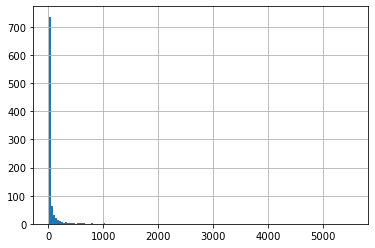

In [27]:
# Подсчет количества игроков для каждого количества раундов

plot_df.hist(bins=150)  # попробуйте поварировать bins=150

#Ваши выводы

Человек 300 прошли более 50 уровней, остальные - менее 30.

Text(0.5, 0, '№ Игрового раунда')

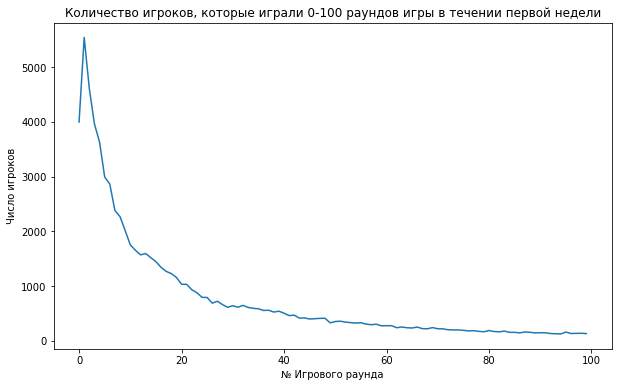

In [13]:
# Построим график распределения игроков, сыгравших от 0 до 100 игровых раундов в течение своей первой недели игры.
%matplotlib inline

ax = plot_df[:100].plot(figsize=(10,6))
ax.set_title("Количество игроков, которые играли 0-100 раундов игры в течении первой недели")
ax.set_ylabel("Число игроков")
ax.set_xlabel('№ Игрового раунда')

Игроки, прошедшие 30 и тем более 40 раунд, доходят до конца (очень маленькое количество пользователей отваливается). Отваливаются в основном до 20 раунда.

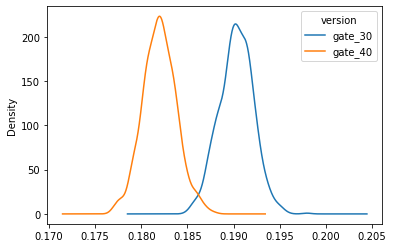

In [14]:
# Creating an list with bootstrapped means for each AB-group
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

При gate-40 распределение ближе к нормальному.

#### Используя любой тест для проверки статистической гипотезы, продемонстрируйте наличие эффекта из-за сдвига ворот.

In [31]:
#from scipy.stats import f_oneway 
#from scipy.stats import wilcoxon
#from scipy.stats import mannwhitneyu
#import scipy.stats as stats
gate_30 = data[data['version'] == 'gate_30']['sum_gamerounds']
gate_40 = data[data['version'] == 'gate_40']['sum_gamerounds']
from scipy.stats import wilcoxon
stat, p = wilcoxon(A,B)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Различный эффект (отвергаем H0)')

Statistics=1930.000, p=0.041
Различный эффект (отвергаем H0)


Эффект лучше при gate_40

In [24]:
# 